Bedanya dengan yang v2? yang v1 lebih detail prosesnya (banyak mencoba semua kemungkinan model dan parameter)

- Target: minimal 2500 baris, minimal 5 fitur (number & category), silhouette score minimal 0.70
- **How to Run Code** 👀👀:
  - lakukan **Run All**:
    - ~4m 38s (full code semua kode diaktifkan)
    - ~1m 22s (kode komputasi lama {fungsi pengecekan} di comment kan)
  - Comment Code / Short Code:
    - Beberapa kode, karena proses komputasi nya lama, dapat di-comment `ctrl + /`, tidak akan mengganggu kode keseluruhan karena hanya kode pengecekan, output tersedia di akhir kode 🫠
    - Kode yang dapat di-comment dimulai dengan #--Start Comment dan diakhiri dengan #--End Comment

**1. Perkenalan Dataset**

This dataset was created to simulate realistic sales patterns in the beverage industry, highlighting important factors like regional preferences, seasonal fluctuations, and customer segmentation. It features both Business-to-Business (B2B) and Business-to-Consumer (B2C) transactions, making it adaptable for a variety of analytical purposes.
- Order_ID Unique identifier for each order. Groups multiple products within the same order.
- Customer_ID Unique identifier for each customer, distinguishing individual buyers.
- Customer_Type Indicates whether the customer is B2B (business-to-business) or B2C (business-to-consumer).
- Product The name of the product purchased, such as "Coca-Cola" or "Erdinger Weißbier".
- Category The product category, such as "Soft Drinks" or "Alcoholic Beverages".
- Unit_Price The price per unit of the product.
- Quantity The number of units purchased for the specified product in the order.
- Discount The discount applied to the product (e.g., 0.1 for 10%). Discounts are only given to B2B customers.
- Total_Price The total price for the product after applying discounts.
- RegionThe region of the customer, such as "Bayern" or "Berlin".
- Order_Date The date when the order was placed.

# **1. Import Library** & **2. Memuat Dataset**

- mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.
- emuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.
- Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [189]:
import pandas as pd
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # untuk joblib mendeteksi core fisik

import seaborn as sns # eksplorasi visualisasi
import matplotlib.pyplot as plt # eksplorasi visualisasi

# Preprocessing
import numpy as np # untuk log1p
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler, MinMaxScaler # Preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering # Model

from sklearn.metrics import silhouette_score # Evaluasi Model [target > 0.7 dengan min 5 fitur (numerik, kategori)]

from itertools import product # untuk hyperparameter tuning K-Means

# Feature Selection
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier # Cek Feature Importance dari Random Forest (tidak menggunakan RFE karena tidak menampilkan persentase importance nya)

In [161]:
df = pd.read_csv('beverage_sales_data_10k.csv') # adalah 10.000 rows sample random dari dataset asli yang ada di kaggle (900k rows x 11 columns) 
df.head(20)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16
5,ORD1905015,CUS7810,B2B,Riesling,Alcoholic Beverages,8.62,47,0.05,384.88,Bayern,2021-02-27
6,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,1.74,5,0.00,8.70,Niedersachsen,2023-08-13
7,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,1.80,15,0.00,27.00,Saarland,2022-10-06
8,ORD1747192,CUS7549,B2B,Havana Club,Alcoholic Beverages,30.22,57,0.10,1550.29,Bayern,2023-03-16
9,ORD1669739,CUS3794,B2B,Vio Wasser,Water,0.98,6,0.05,5.59,Niedersachsen,2021-09-20


# **3. Exploratory Data Analysis (EDA)**
- **Memahami Struktur Data** (Jumlah baris dan kolom, Jenis data (numerikal atau kategorikal))
- **Menangani Data yang Hilang**  (Pengisian atau penghapusan)
- **Analisis Distribusi dan Korelasi** (Analisis Distribusi (statistika deskripfit, histogram, boxplot), hubungan variabel (matriks korelasi atau scatter plot))
- **Visualisasi Data** (grafik distribusi & diagram batang untuk variabel kategorikal, Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel)

## 3.1. Data Structure, Duplicate & Missing Value

In [162]:
print(f"DF: {df.shape[0]} rows x {df.shape[1]} columns")
display(df.info()) # tipe data sesuai (object bisa diubah ke category)
display(df.head())
display(df.describe().T) # nilai right skewed

print(df.duplicated().sum()) # no duplicate
print(df.isna().sum()) # no missing value

DF: 10000 rows x 11 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.5+ KB


None

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


,count,mean,std,min,25%,50%,75%,max
Unit_Price,10000.0,5.876568,15.093122,0.33,1.05,1.75,3.1900,138.72
Quantity,10000.0,22.787500,26.569801,1.00,6.00,11.00,29.0000,100.00
Discount,10000.0,0.029495,0.044710,0.00,0.00,0.00,0.0500,0.15
Total_Price,10000.0,135.385663,528.922868,0.35,8.30,20.70,67.8425,10111.96


0
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


## 3.2. Category Variance & Count

In [163]:
cols = df.select_dtypes(exclude=['int64','float64']).columns
for col in cols:
    print(f"Len {col}: {len(df[col].unique().tolist())}") # unique values
    print(f"{col}: {df[col].unique().tolist()}\n")

Len Order_ID: 9994
Order_ID: ['ORD1663596', 'ORD1999010', 'ORD347756', 'ORD600360', 'ORD2300591', 'ORD1905015', 'ORD2638652', 'ORD803183', 'ORD1747192', 'ORD1669739', 'ORD7309', 'ORD1335063', 'ORD1027922', 'ORD1271103', 'ORD2464854', 'ORD2267500', 'ORD2805233', 'ORD2842493', 'ORD176500', 'ORD1143329', 'ORD2848930', 'ORD1807814', 'ORD1191549', 'ORD277724', 'ORD465844', 'ORD641791', 'ORD2342999', 'ORD760208', 'ORD1958004', 'ORD2739791', 'ORD2748943', 'ORD925607', 'ORD303869', 'ORD941678', 'ORD28261', 'ORD909319', 'ORD2873933', 'ORD956181', 'ORD990049', 'ORD140621', 'ORD797615', 'ORD44574', 'ORD954366', 'ORD1838793', 'ORD2179028', 'ORD1685779', 'ORD1889368', 'ORD947422', 'ORD2111882', 'ORD1324132', 'ORD1208029', 'ORD57899', 'ORD927220', 'ORD1104071', 'ORD2291655', 'ORD863071', 'ORD2540676', 'ORD2704617', 'ORD1920379', 'ORD2941370', 'ORD1641649', 'ORD2929028', 'ORD1339838', 'ORD2197012', 'ORD1950753', 'ORD304660', 'ORD437227', 'ORD1884831', 'ORD353623', 'ORD1461278', 'ORD2933592', 'ORD1924

## 3.3. Distribution, Outliers & Correlation

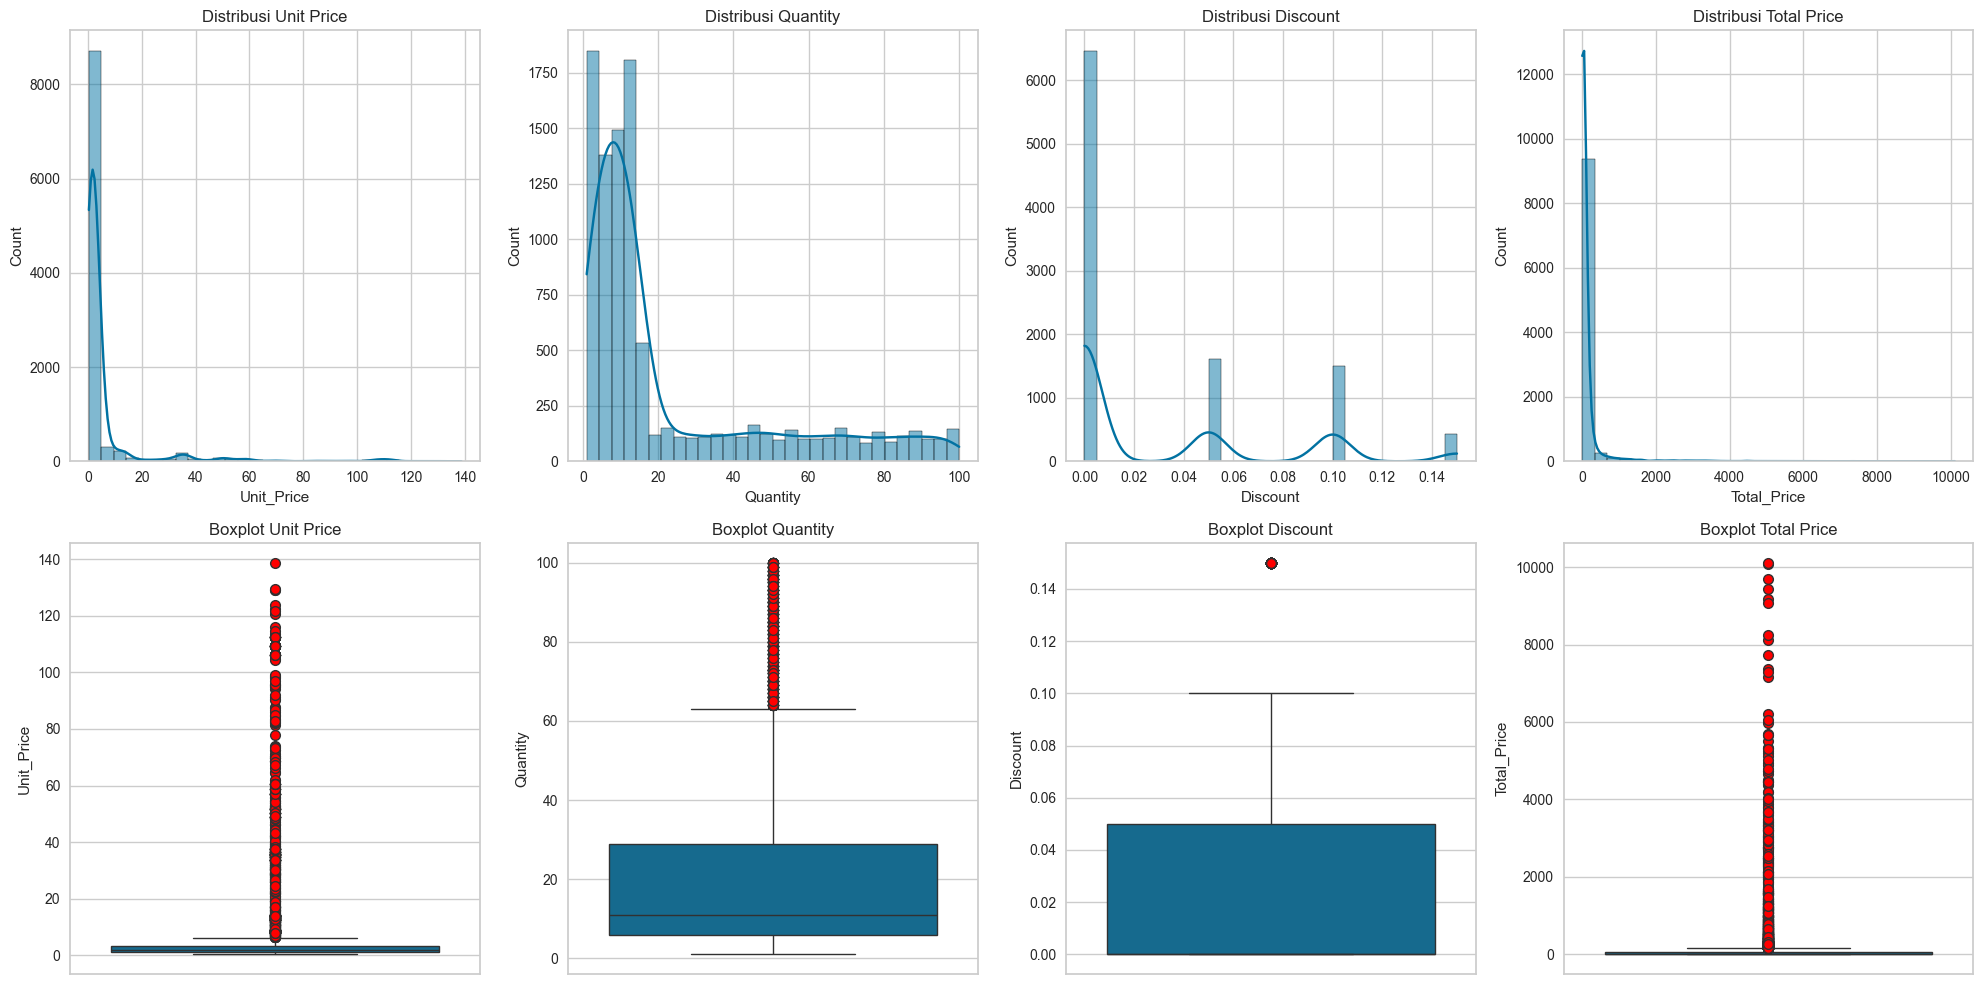

             Jumlah Outlier  Persentase Outlier (%)
Unit_Price             1208                   12.08
Quantity               1264                   12.64
Discount                431                    4.31
Total_Price            1293                   12.93


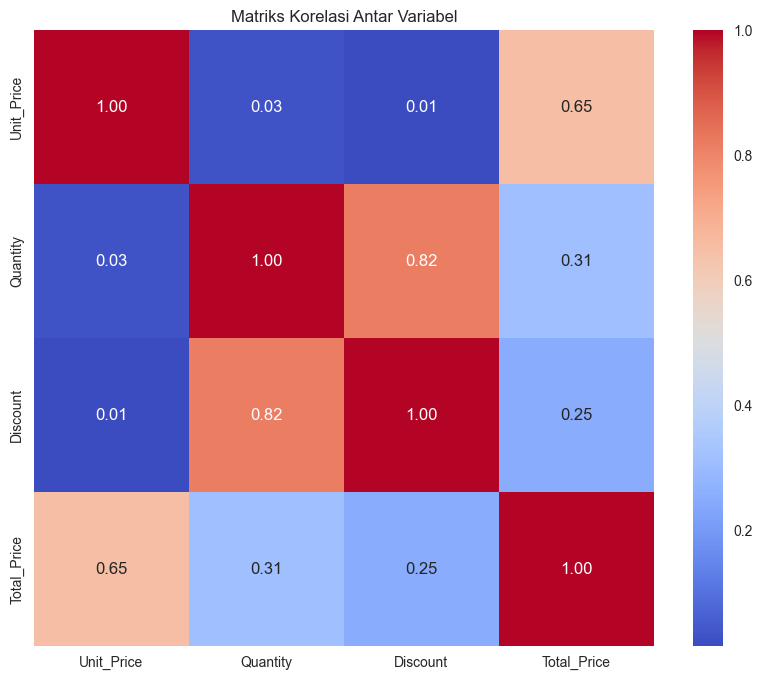

In [164]:
#--- DISTRIBUTION ---
# Buat figure dan axis dengan 2 baris (histogram & boxplot) & 4 kolom (jumlam kolom numerik)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Data numberic yang di plot, normalisasi & cleaning
dict_nums = {
    "Unit Price": df["Unit_Price"],
    "Quantity": df["Quantity"],
    "Discount": df["Discount"],
    "Total Price": df["Total_Price"]
}

# Looping untuk membuat histogram (Distribusi) di baris pertama & boxplot (Outliers) di baris kedua
for i, (label, data) in enumerate(dict_nums.items()):
    # Baris 1: Histogram (Distribusi Data)
    sns.histplot(data, bins=30, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"Distribusi {label}")

    # Baris 2: Boxplot (Outliers)
    sns.boxplot(data=data, orient="v", ax=axes[1, i], flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 7})
    axes[1, i].set_title(f"Boxplot {label}")

# Atur tata letak agar tidak bertumpuk
plt.tight_layout()
plt.show()

# Outlier Number & Percentage
test_df = df.select_dtypes(include=['float64', 'int64']).copy() # ambil kolom numerik

# Menghitung IQR untuk setiap kolom numerik
Q1 = test_df.quantile(0.25)
Q3 = test_df.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier
outlier_counts = ((test_df < lower_bound) | (test_df > upper_bound)).sum()

# Menghitung persentase outlier
outlier_percentage = (outlier_counts / len(test_df)) * 100

# Menampilkan hasil
outlier_info = pd.DataFrame({'Jumlah Outlier': outlier_counts, 'Persentase Outlier (%)': outlier_percentage})
print(outlier_info)


#--- CORRELATION ---
# Menghitung Korelasi Kolom Numeriknya
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

- 🌟 Standarisasi dan Outlier Handling akan dilakukan setelah jika Silhoutte Score < 0.7
- Correlation:
  - Fitur Quantity dan Discount memiliki korelasi tinggi → Bisa dipertimbangkan untuk reduksi dimensi atau hanya memilih salah satu.
  - Unit Price dan Total Price masih cukup aman digunakan bersama, tetapi perlu diperhatikan saat scaling.
  - Jika ingin mengurangi redundansi (terutama pada Quantity-Discount), bisa lakukan PCA atau seleksi fitur.

# **4. Data Preprocessing**
- Menghapus atau Menangani Data Kosong (Missing Values) ❌ Tidak ada missing value
- Menghapus Data Duplikat ❌ tidak ada duplikasi data
- Hapus Fitur/Kolom tidak Bermakna ✅ (Kolom ID tidak menggambarkan karakter)
- Deteksi dan Penanganan Outlier ⏩ (Jika Silhoute Score < 0.7 mungin diperlukan)
- Normalisasi atau Standarisasi Fitur ⏩ (Jika Silhoute Score < 0.7 mungin diperlukan)
- Encoding Data Kategorikal ✅(untuk uji dengan semua fitur)
- Binning (Pengelompokan Data) ❌ Tidak ada data ordinal yang bisa di binning kan

Dalam clustering, setiap data harus memiliki nilai numerik yang lengkap karena algoritma clustering seperti K-Means, Hierarchical Clustering, dan DBSCAN tidak bisa menangani missing values secara langsung. 

In [165]:
number_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price'] # digunakan unutk pemisah data numerik

## 4.1. Hapus Fitur/Kolom Tidak Bermakna

In [166]:
df2 = df.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date']) # kolom ID (product_id & customer_id) dan kolom waktu tidak memberikan informasi yang bermakna
df2.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen
1,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen
2,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen
3,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg
4,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen


## 4.2. Handling Outlier (not useful)
Outlier terlalu banyak ( rata-rata > 10%), kita akan melakukan trimming berdasarkan jumlah hasil persentase outlier. Pertimbangan sebagai berikut:
| **Metode**                          | **Cara Kerja** | **Cocok Untuk** | **Kelebihan** | **Kekurangan** |
|--------------------------------------|---------------|----------------|--------------|---------------|
| **Trimming (Penghapusan Outlier)**   | Menghapus data yang berada di luar batas tertentu (IQR, Z-score) | Data besar, outlier yang jelas | Menghilangkan noise | Bisa kehilangan informasi penting |
| **Capping (Winsorizing)**            | Mengubah nilai outlier menjadi batas tertentu (misalnya persentil 1% dan 99%) | Data kecil hingga menengah | Menjaga distribusi data | Bisa merusak distribusi asli |
| **Transformasi (Log, Box-Cox)**       | Menerapkan transformasi logaritma atau Box-Cox untuk mengurangi skewness | Data skewed atau distribusi tidak normal | Mengurangi dampak outlier | Tidak menghilangkan outlier sepenuhnya |
| **Clustering-Based Filtering**        | Menggunakan algoritma seperti DBSCAN yang bisa mengidentifikasi outlier sebagai noise | Clustering tanpa asumsi jumlah klaster tetap | Deteksi outlier otomatis | Bisa terlalu sensitif terhadap parameter |
| **Imputasi (Median, Mean, Mode)**     | Mengganti outlier dengan nilai median atau mean | Data dengan distribusi normal atau hampir normal | Mudah diterapkan | Bisa menyebabkan bias jika outlier banyak |
| **Isolation Forest / LOF (Local Outlier Factor)** | Model Machine Learning untuk mendeteksi outlier berdasarkan kepadatan data | Data besar dengan pola kompleks | Efektif untuk data non-linier | Perlu tuning parameter |

In [167]:
df3 = df2.copy()

# Persentase outlier yang diketahui
outlier_percentages = {
    'Unit_Price': 0.1208,   # 12.08%
    'Quantity': 0.1264,     # 12.64%
    'Discount': 0.0431,     # 4.31%
    'Total_Price': 0.1293   # 12.93%
}

# Menghapus outlier berdasarkan persentase
for column, percentage in outlier_percentages.items():
    lower_bound = df2[column].quantile(percentage / 100)  # Batas bawah (ambil 1/100 agar mencegah rusaknya distribusi asli)
    upper_bound = df2[column].quantile(1 - (percentage / 100))  # Batas atas

    df3 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

# Menampilkan data setelah penghapusan outlier
print(f"Row {df3.shape[0]}, {df3.shape[0]/df2.shape[0]*100:.2f}% from 10k data")
df3.head(2)

Row 9978, 99.78% from 10k data


,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen
1,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen


In [ ]:


## Uji Perubahan data setelah dan sebelum outlier dihapus (menggunakan data numerik untuk clustering menggunakan KMeans dan hasil Silhoutte Score nya)
datasets1 = {
    "df2": df2.select_dtypes(include=['int64', 'float64']), # Data Hasil Filter Outliers
    "df3": df3.select_dtypes(include=['int64', 'float64']) # Data Hasil Filter Outliers
}

scores_summary = {}

# Kode ini dapat dikomentar karena proses nya ~12s (tidak akan mengganggu proses keseluruhan, hasil output ada diakhir kode)
##--Start Comment
# Range K yang akan diuji (misalnya 2-3, juga akan diuji nanti menggunakan elbow method)
for name, df in datasets1.items():
    scores = []  # Simpan semua skor untuk setiap K dalam satu dataset
    for n_cluster in range(2, 4):
        score = silhouette_score(df[number_cols], 
                                 KMeans(n_clusters=n_cluster, random_state=42, n_init=10).fit_predict(df[number_cols]))
        scores.append(score)
        print(f"Silhouette Score untuk K={n_cluster} pada {name}: {score:.3f}")

    # Hitung rata-rata score untuk dataset saat ini
    avg_score = np.mean(scores)
    scores_summary[name] = avg_score

# Tampilkan hasil akhir
print("\n📊 Rata-rata Silhouette Score per Dataset:")
for dataset, avg_score in scores_summary.items():
    print(f"{dataset}: {avg_score:.3f}")
#--End Comment

### --- OUTPUT --- ###
# Silhouette Score untuk K=2 pada df2: 0.953
# Silhouette Score untuk K=3 pada df2: 0.931
# Silhouette Score untuk K=2 pada df3: 0.946
# Silhouette Score untuk K=3 pada df3: 0.904

# 📊 Rata-rata Silhouette Score per Dataset (Kmean n = 2-3):
# df2: 0.942
# df3: 0.925

Silhouette Score untuk K=2 pada df2: 0.953
Silhouette Score untuk K=3 pada df2: 0.931
Silhouette Score untuk K=2 pada df3: 0.946
Silhouette Score untuk K=3 pada df3: 0.904

📊 Rata-rata Silhouette Score per Dataset:
df2: 0.942
df3: 0.925


🌟 karena score tertinggi pada df2, maka kita masih akan menggunakan df2, Outlier Handling tidak diperlukan

## 4.3. Encoding
Karena data akan dipecah untuk menguji dengan berbagai metode scalling, maka encoding dilakukan lebih dulu

| Encoding             | Cocok Jika                        | Kelebihan                          | Kekurangan                             | Checklist
|----------------------|--------------------------------|----------------------------------|--------------------------------------|------------|
| **One-Hot Encoding (OHE)** | Kategori sedikit, data nominal | Mudah digunakan, hasil akurat   | Dimensi tinggi jika banyak kategori | ✅ all category | 
| **Label Encoding**   | Kategori ordinal              | Efisien, tidak meningkatkan dimensi | Tidak cocok untuk data nominal      |            |
| **Frequency Encoding** | Kategori banyak, skala besar  | Mengurangi dimensi tinggi        | Tidak mempertahankan hubungan kategori |            |
| **Embedding Encoding** | Data kompleks, teks, lokasi   | Representasi lebih akurat       | Butuh komputasi lebih tinggi        |            |

In [169]:
df4 = df2.copy() # Karena df2 memiliki score tertinggi, kita masih akan menggunakannya (df3 yang filter outlier tidak akan digunakan)
obj_cols = df2.select_dtypes(include=['object']).columns

# ubah object ke tipe data category (mempercepat proses encoding)
for col in obj_cols:
    df4[col] = df4[col].astype('category')

df4.info()

# Len Customer_Type: 2 Unique Values
# Len Product: 47 Unique Values
# Len Category: 4 Unique Values
# Len Region: 16 Unique Values

# Encoding Kategori 
# one hot untuk Customer_Type, Category, Region. data < 30
df4 = pd.get_dummies(df4, columns=["Customer_Type", "Category", "Region"])

# Label Encode untuk Product. Data > 30
label_encoder = LabelEncoder() # digunakan kembali ketika transformasi original

df4['Product'] = label_encoder.fit_transform(df4['Product'])

df4.info()
df4.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Customer_Type  10000 non-null  category
 1   Product        10000 non-null  category
 2   Category       10000 non-null  category
 3   Unit_Price     10000 non-null  float64 
 4   Quantity       10000 non-null  int64   
 5   Discount       10000 non-null  float64 
 6   Total_Price    10000 non-null  float64 
 7   Region         10000 non-null  category
dtypes: category(4), float64(3), int64(1)
memory usage: 354.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product                        10000 non-null  int64  
 1   Unit_Price                     10000 non-null  float64
 2   Quantity                 

,Product,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,...,Region_Hessen,Region_Mecklenburg-Vorpommern,Region_Niedersachsen,Region_Nordrhein-Westfalen,Region_Rheinland-Pfalz,Region_Saarland,Region_Sachsen,Region_Sachsen-Anhalt,Region_Schleswig-Holstein,Region_Thüringen
0,15,1.87,74,0.10,124.54,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,11,1.87,18,0.05,31.98,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## 4.4. Transform or Scalling df filtered (not useful)
Mencari Scalling Terbaik, dan didapat adalah RobustScaller. Tapi Silhoutte Score tertinggi masih dimiliki data oroginal (sample_df)

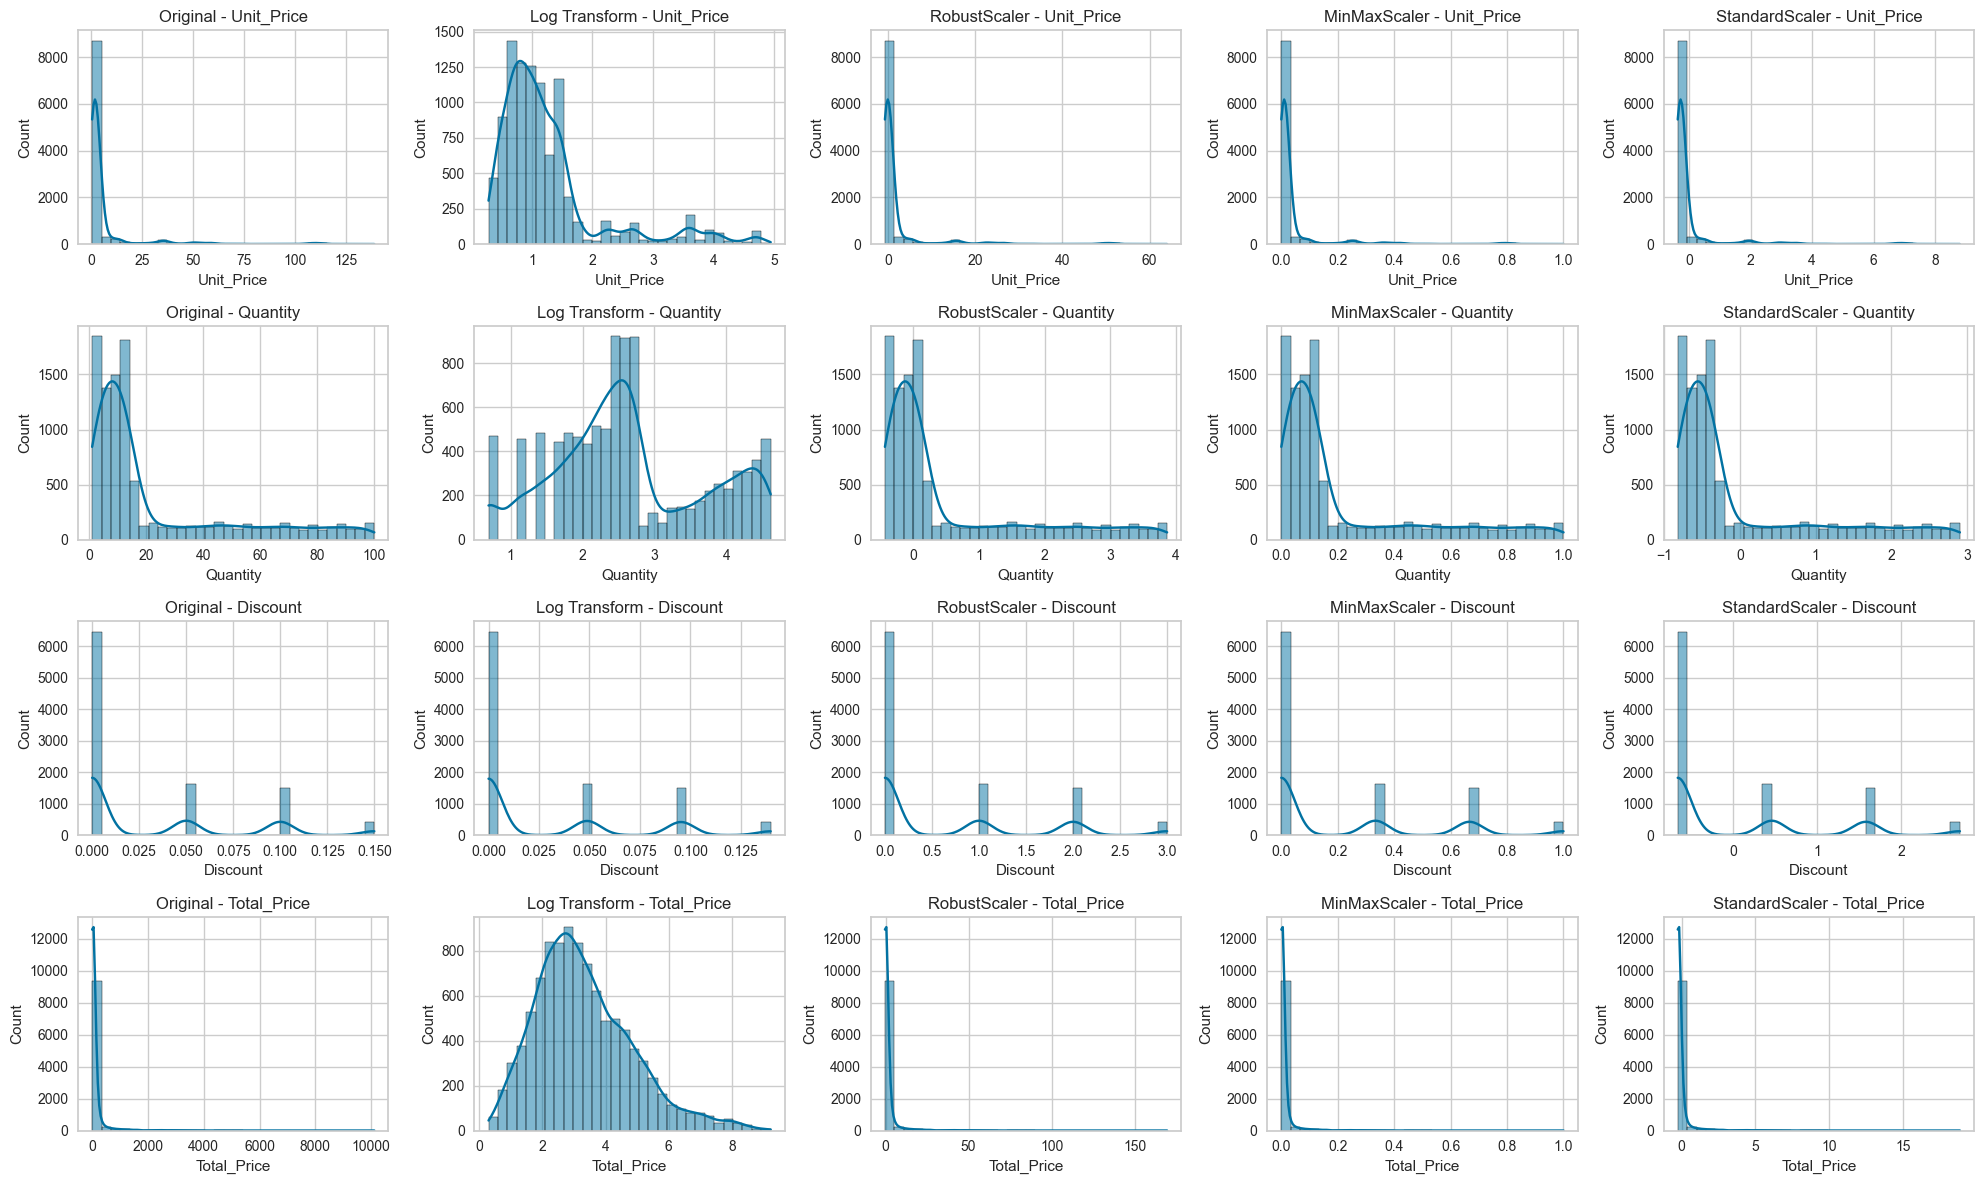

In [170]:
### Log Transform (np.log1p()) → Cocok untuk data dengan distribusi sangat skewed
df_log = df4.select_dtypes(include='object').copy()
df_log[number_cols] = df4[number_cols].apply(np.log1p)

### RobustScaler → Cocok untuk data dengan banyak outlier
df_rs = df4.select_dtypes(include='object').copy()
df_rs[number_cols] = RobustScaler().fit_transform(df4[number_cols])

### MinMaxScaler → Jika ingin data berada dalam rentang [0,1]
df_mms = df4.select_dtypes(include='object').copy()
df_mms[number_cols] = MinMaxScaler().fit_transform(df4[number_cols])

### StandardScaler → Jika data akan digunakan dalam metode berbasis jarak (K-Means, PCA, dll.)
df_ss = df4.select_dtypes(include='object').copy()
df_ss[number_cols] = StandardScaler().fit_transform(df4[number_cols])

# List dataset hasil normalisasi
datasets = [df4, df_log, df_rs, df_mms, df_ss]
titles = ["Original", "Log Transform", "RobustScaler", "MinMaxScaler", "StandardScaler"]

# Buat subplots (4 baris untuk setiap variabel, 5 kolom untuk setiap metode)
fig, axes = plt.subplots(4, 5, figsize=(20, 12))

# Loop melalui setiap dataset dan setiap variabel
for i, (df, title) in enumerate(zip(datasets, titles)):
    for j, col in enumerate(number_cols):
        sns.histplot(df[col], bins=30, kde=True, ax=axes[j, i])
        axes[j, i].set_title(f"{title} - {col}")

plt.tight_layout()
plt.show()

### Periksa Scaling terbaik menggunakan Silhoutte Score dari KMeans
Kode Testing dapat Dimatikan karena komputasi butuh 31s (tidak akan mengganggu proses keseluruhan). Hasil output ada di akhir kode

In [171]:
datasets2 = {
    "df_log": df_log,  # Log Transform
    "df_rs": df_rs,  # RobustScaler
    "df_mms": df_mms,  # MinMaxScaler
    "df_ss": df_ss,  # StandardScaler
    "original": df4.select_dtypes(include=['int64', 'float64']) # Data Hasil Filter Outliers
}

scores_summary = {}

#--Start Comment
# Range K yang akan diuji (misalnya 2-3, akan diuji nanti menggunakan elbow method)
for name, df in datasets2.items():
    scores = []  # Simpan semua skor untuk setiap K dalam satu dataset
    for n_cluster in range(2, 4):
        score = silhouette_score(df[number_cols], 
                                 KMeans(n_clusters=n_cluster, random_state=42, n_init=10).fit_predict(df[number_cols]))
        scores.append(score)
        print(f"Silhouette Score untuk K={n_cluster} pada {name}: {score:.3f}")

    # Hitung rata-rata score untuk dataset saat ini
    avg_score = np.mean(scores)
    scores_summary[name] = avg_score

# Tampilkan hasil akhir
print("\n📊 Rata-rata Silhouette Score per Dataset:")
for dataset, avg_score in scores_summary.items():
    print(f"{dataset}: {avg_score:.3f}")
#--End Comment

### --- OUTPUT --- ###
# Original data (31s rendering)
# Silhouette Score untuk K=2 pada df_log: 0.498
# Silhouette Score untuk K=3 pada df_log: 0.472
# Silhouette Score untuk K=2 pada df_rs: 0.909
# Silhouette Score untuk K=3 pada df_rs: 0.864
# Silhouette Score untuk K=2 pada df_mms: 0.699
# Silhouette Score untuk K=3 pada df_mms: 0.658
# Silhouette Score untuk K=2 pada df_ss: 0.635
# Silhouette Score untuk K=3 pada df_ss: 0.663
# Silhouette Score untuk K=2 pada original: 0.953
# Silhouette Score untuk K=3 pada original: 0.931

# 📊 Rata-rata Silhouette Score per Dataset:
# df_log: 0.485
# df_rs: 0.887
# df_mms: 0.679
# df_ss: 0.649
# original: 0.942

Silhouette Score untuk K=2 pada df_log: 0.498
Silhouette Score untuk K=3 pada df_log: 0.472
Silhouette Score untuk K=2 pada df_rs: 0.909
Silhouette Score untuk K=3 pada df_rs: 0.864
Silhouette Score untuk K=2 pada df_mms: 0.699
Silhouette Score untuk K=3 pada df_mms: 0.658
Silhouette Score untuk K=2 pada df_ss: 0.635
Silhouette Score untuk K=3 pada df_ss: 0.663
Silhouette Score untuk K=2 pada original: 0.953
Silhouette Score untuk K=3 pada original: 0.931

📊 Rata-rata Silhouette Score per Dataset:
df_log: 0.485
df_rs: 0.887
df_mms: 0.679
df_ss: 0.649
original: 0.942


🌟 Score terbaik masih dipegang df4 (Original), Scalling tidak diperlukan

In [172]:
for name, df in datasets2.items():
    display(df.head(2))

,Unit_Price,Quantity,Discount,Total_Price
0,1.054312,4.317488,0.09531,4.832624
1,1.054312,2.944439,0.04879,3.495901


,Unit_Price,Quantity,Discount,Total_Price
0,0.056075,2.739130,2.0,1.743964
1,0.056075,0.304348,1.0,0.189445


,Unit_Price,Quantity,Discount,Total_Price
0,0.011128,0.737374,0.666667,0.012282
1,0.011128,0.171717,0.333333,0.003128


,Unit_Price,Quantity,Discount,Total_Price
0,-0.26547,1.927567,1.577015,-0.020506
1,-0.26547,-0.180195,0.458644,-0.195512


,Product,Unit_Price,Quantity,Discount,Total_Price
0,15,1.87,74,0.10,124.54
1,11,1.87,18,0.05,31.98


In [173]:
# Kita akan menggunakan df4 original karena memiliki score tertinggi
df4.head()

,Product,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,...,Region_Hessen,Region_Mecklenburg-Vorpommern,Region_Niedersachsen,Region_Nordrhein-Westfalen,Region_Rheinland-Pfalz,Region_Saarland,Region_Sachsen,Region_Sachsen-Anhalt,Region_Schleswig-Holstein,Region_Thüringen
0,15,1.87,74,0.10,124.54,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,11,1.87,18,0.05,31.98,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,22,12.04,71,0.15,726.61,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,26,64.91,91,0.10,5316.13,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,1.64,4,0.00,6.56,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False


# **5. Model Clustering** (using df4)

## 5.1. Build & Evaluate All Possible Model (Type & Cluster)

- Pilih algoritma clustering yang sesuai.
- Latih model dengan data menggunakan algoritma tersebut.
- Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
- Hitung Silhouette Score sebagai ukuran kualitas cluster.


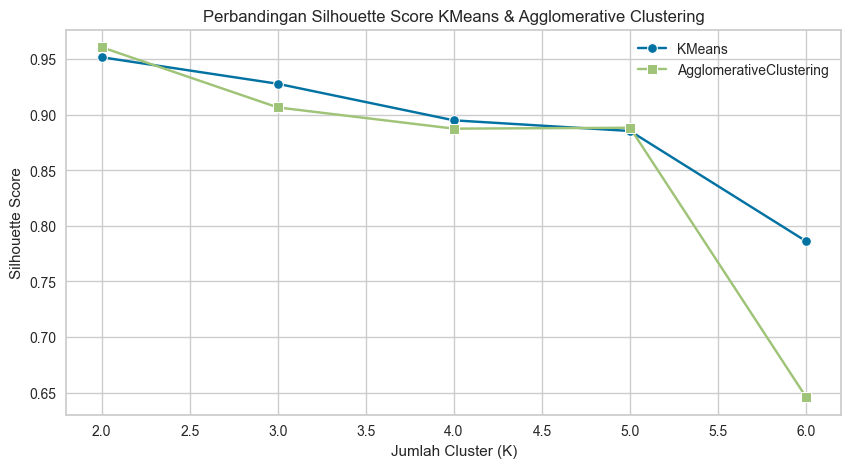

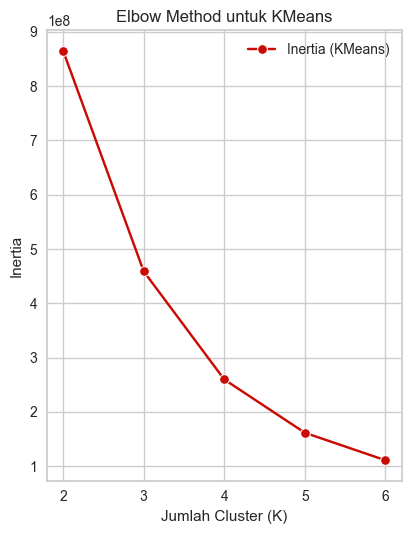

In [192]:
# Kode dapat dimatikan, tidak mengganggu proses keseluran [43s rendering], hasil visualisasi ada di akhir
#--Start Comment
# Inisialisasi dictionary untuk menyimpan hasil
silhouette_scores = {
    "KMeans": [],
    "Agglomerative": []
}

inertia_values = []  # Untuk menyimpan inertia (Elbow Method)
cluster_range = range(2, 7)  # Mulai dari 2 hingga 6 cluster (karena 1 cluster tidak memiliki silhouette score)

# BUILD: Loop untuk jumlah cluster 2 sampai 6 
# Menggunakan df4 (tanpa Outlier handling, dengan Encoding, Tanpa Scaling)
for k in cluster_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(df4)
    kmeans_score = silhouette_score(df4, kmeans_labels)
    silhouette_scores["KMeans"].append(kmeans_score)
    inertia_values.append(kmeans.inertia_)  # Simpan inertia untuk Elbow Method

    # AgglomerativeClustering
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo.fit_predict(df4)
    agglo_score = silhouette_score(df4, agglo_labels)
    silhouette_scores["Agglomerative"].append(agglo_score)

# EVALUATE: Visualisasi hasil dengan plot garis
plt.figure(figsize=(10, 5))
sns.lineplot(x=list(cluster_range), y=silhouette_scores["KMeans"], marker="o", label="KMeans")
sns.lineplot(x=list(cluster_range), y=silhouette_scores["Agglomerative"], marker="s", label="AgglomerativeClustering")

plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score KMeans & Agglomerative Clustering")
plt.legend()
plt.grid(True)
plt.show()

# EVALUEATE: Visualisasi Elbow Method
plt.subplot(1, 2, 2)
sns.lineplot(x=list(cluster_range), y=inertia_values, marker="o", color="r", label="Inertia (KMeans)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk KMeans")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
#--End Comment

- 🌟 Optimum KMeans, n_cluster = 2. Elbow method tidak punya patahan yang kuat di range 2-6.
- 🌟 kita akan menggunakan n_cluster = 5 karena itu maksimum cluster dengan score tertinggi sebelum drop 

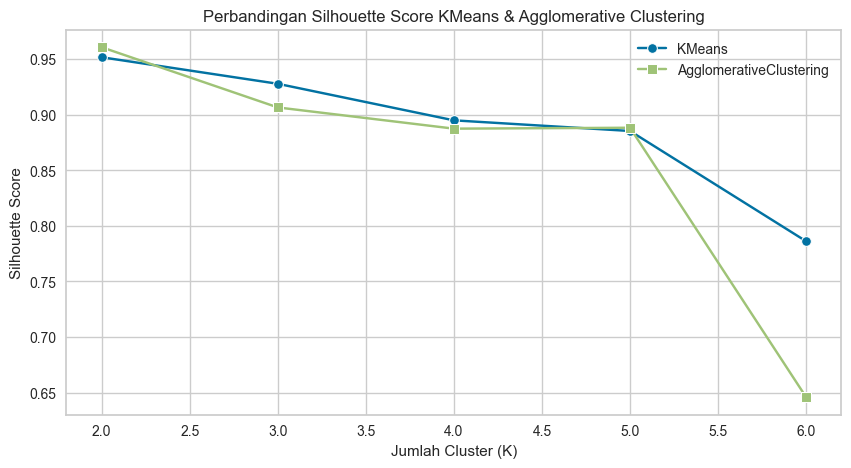

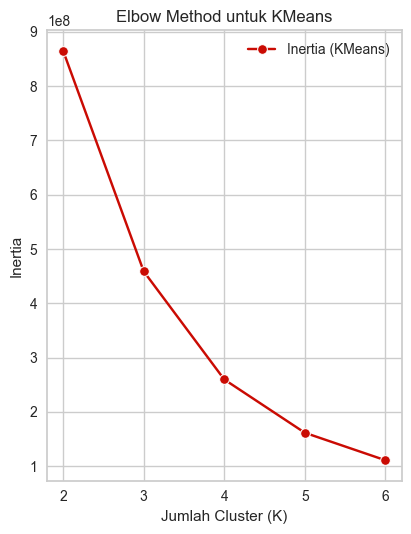

### 1st Model Cluster

In [175]:
kmeans_score = silhouette_score(df4, KMeans(n_clusters=5, random_state=42, n_init=10).fit_predict(df4))
print(f"Silhouette Score untuk K=5 KMeans: {kmeans_score:.5f}") # 0.88546

agglo_score = silhouette_score(df4, AgglomerativeClustering(n_clusters=5).fit_predict(df4))
print(f"Silhouette Score untuk K=5 Agglomerative: {agglo_score:.5f}") # 0.88838

Silhouette Score untuk K=5 KMeans: 0.88546
Silhouette Score untuk K=5 Agglomerative: 0.88838


## 5.2. Hyperparameter Tuning

### KMeans
Seleksi Setingan KMeans Terbaik (Kode dapat dimatikan karena proses memakan 1m 37s, hasil output ada di akhir kode)

In [176]:
# Parameter yang akan diuji
init_methods = ["k-means++", "random"]
n_init_values = [10, 20]
algorithms = ["lloyd", "elkan"]
max_iter_values = [300, 500]
tol_values = [1e-4, 1e-3]

# Looping untuk semua kombinasi hyperparameter
best_score = -1
best_params = None
results = []

#--Start Comment
for init, n_init, algo, max_iter, tol in product(init_methods, n_init_values, algorithms, max_iter_values, tol_values):
    kmeans = KMeans(
        n_clusters=5, init=init, n_init=n_init, algorithm=algo,
        max_iter=max_iter, tol=tol, random_state=42
    )
    labels = kmeans.fit_predict(df4)
    score = silhouette_score(df4, labels)
    
    results.append((init, n_init, algo, max_iter, tol, score))

    # Simpan konfigurasi terbaik
    if score > best_score:
        best_score = score
        best_params = (init, n_init, algo, max_iter, tol)

# Konversi hasil ke DataFrame
results_df = pd.DataFrame(results, columns=["init", "n_init", "algorithm", "max_iter", "tol", "silhouette_score"])

# Tampilkan hasil terbaik
print("\n📊 Konfigurasi Terbaik untuk KMeans:")
print(f"Inisialisasi: {best_params[0]}")
print(f"n_init: {best_params[1]}")
print(f"Algoritma: {best_params[2]}")
print(f"max_iter: {best_params[3]}")
print(f"tol: {best_params[4]}")
print(f"Silhouette Score Terbaik: {best_score:.6f}")

# Menampilkan 5 konfigurasi terbaik
print("\n📊 5 Konfigurasi Terbaik:")
print(results_df.sort_values(by="silhouette_score", ascending=False).head(5))
#--End Comment

### ---- OUTPUT ---- ###
# 📊 Konfigurasi Terbaik untuk KMeans (N Cluster = 5):
# Inisialisasi: k-means++
# n_init: 10
# Algoritma: lloyd
# max_iter: 300
# tol: 0.0001
# Silhouette Score Terbaik: 0.885456

# 📊 5 Konfigurasi Terbaik:
#         init  n_init algorithm  max_iter     tol  silhouette_score
# 0  k-means++      10     lloyd       300  0.0001          0.885456
# 1  k-means++      10     lloyd       300  0.0010          0.885456
# 2  k-means++      10     lloyd       500  0.0001          0.885456
# 3  k-means++      10     lloyd       500  0.0010          0.885456
# 4  k-means++      10     elkan       300  0.0001          0.885456


📊 Konfigurasi Terbaik untuk KMeans:
Inisialisasi: k-means++
n_init: 10
Algoritma: lloyd
max_iter: 300
tol: 0.0001
Silhouette Score Terbaik: 0.885456

📊 5 Konfigurasi Terbaik:
        init  n_init algorithm  max_iter     tol  silhouette_score
0  k-means++      10     lloyd       300  0.0001          0.885456
1  k-means++      10     lloyd       300  0.0010          0.885456
2  k-means++      10     lloyd       500  0.0001          0.885456
3  k-means++      10     lloyd       500  0.0010          0.885456
4  k-means++      10     elkan       300  0.0001          0.885456


### Agglomerative Clustering
Seleksi Setingan Agglomerative Clustering Terbaik (Kode dapat dimatikan karena proses memakan ~54s, hasil output di akhir kode)

In [177]:
# Parameter yang akan diuji 
linkage_methods = ["ward", "complete", "average", "single"]
affinity_methods = ["euclidean", "manhattan", "cosine"]

# Looping untuk semua kombinasi hyperparameter
best_score = -1
best_params = None
results = []

#--Start Comment
for linkage in linkage_methods:
    for affinity in affinity_methods:
        # 🔹 Ward hanya bisa digunakan dengan Euclidean
        if linkage == "ward" and affinity != "euclidean":
            continue
        
        try:
            # 🔹 Untuk scikit-learn >= 1.2, gunakan metric bukan affinity
            model = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric=affinity)
            labels = model.fit_predict(df4)
            score = silhouette_score(df4, labels)
            
            results.append((linkage, affinity, score))

            # 🔹 Simpan konfigurasi terbaik
            if score > best_score:
                best_score = score
                best_params = (linkage, affinity)
        except Exception as e:
            print(f"⚠️ Error dengan Linkage={linkage}, Affinity={affinity}: {e}")
            continue  # Abaikan kombinasi yang tidak valid

# 🔹 Konversi hasil ke DataFrame
results_df = pd.DataFrame(results, columns=["linkage", "affinity", "silhouette_score"])

# 🔹 Cek apakah ada hasil yang valid
if best_params:
    print("\n📊 Konfigurasi Terbaik untuk Agglomerative Clustering:")
    print(f"Linkage: {best_params[0]}")
    print(f"Affinity: {best_params[1]}")
    print(f"Silhouette Score Terbaik: {best_score:.6f}")

    # 🔹 Menampilkan 5 konfigurasi terbaik
    print("\n📊 5 Konfigurasi Terbaik:")
    print(results_df.sort_values(by="silhouette_score", ascending=False).head(5))
else:
    print("\n❌ Tidak ada konfigurasi valid yang ditemukan.")
#--End Comment

### ---- OUTPUT ---- ###
# 📊 Konfigurasi Terbaik untuk Agglomerative Clustering:
# Linkage: single
# Affinity: euclidean
# Silhouette Score Terbaik: 0.963919

# 📊 5 Konfigurasi Terbaik:
#     linkage   affinity  silhouette_score
# 7    single  euclidean          0.963919
# 8    single  manhattan          0.963919
# 5   average  manhattan          0.937568
# 4   average  euclidean          0.937568
# 2  complete  manhattan          0.937568


📊 Konfigurasi Terbaik untuk Agglomerative Clustering:
Linkage: single
Affinity: euclidean
Silhouette Score Terbaik: 0.963919

📊 5 Konfigurasi Terbaik:
    linkage   affinity  silhouette_score
7    single  euclidean          0.963919
8    single  manhattan          0.963919
5   average  manhattan          0.937568
4   average  euclidean          0.937568
2  complete  manhattan          0.937568


### 2nd Model Cluster (Hyperparameter Tuning)

In [178]:
kmeans_score = silhouette_score(df4, KMeans( n_clusters=5, init="k-means++", n_init=10, algorithm="lloyd", max_iter=300, tol=0.0001, random_state=42).fit_predict(df4))
print(f"Silhouette Score untuk K=5 KMeans (Hyperparameter Tuning): {kmeans_score:.5f}") # 0.88546

agglo_score = silhouette_score(df4, AgglomerativeClustering(n_clusters=5, linkage="single", metric="euclidean").fit_predict(df4))
print(f"Silhouette Score untuk K=5 Agglomerative Clustering (Hyperparameter Tuning): {agglo_score:.5f}") # 0.96392

Silhouette Score untuk K=5 KMeans (Hyperparameter Tuning): 0.88546
Silhouette Score untuk K=5 Agglomerative Clustering (Hyperparameter Tuning): 0.96392


## 5.3. Feature Selection (Opsional)
Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### KMeans

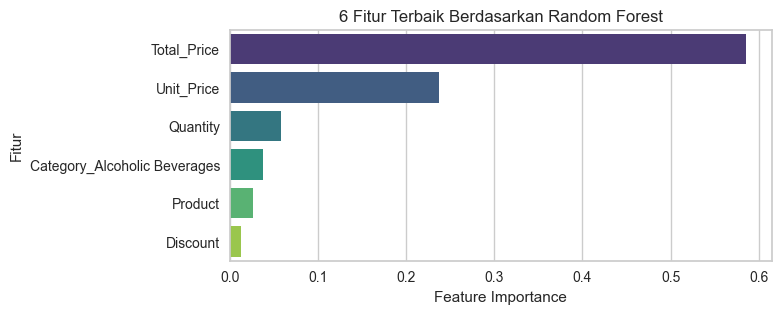


📊 5 Fitur Terbaik berdasarkan Random Forest:
                          Fitur  Importance
4                   Total_Price    0.585868
1                    Unit_Price    0.237210
2                      Quantity    0.057783
7  Category_Alcoholic Beverages    0.037887
0                       Product    0.026530
3                      Discount    0.012991


In [179]:
df_final_kmean = df4.copy()

df_final_kmean['cluster'] = KMeans( n_clusters=5, init="k-means++", n_init=10, algorithm="lloyd", max_iter=300, tol=0.0001, random_state=42).fit_predict(df4)

# Pisahkan fitur (X) dan cluster (y) - pastikan cluster ada di dataset
X = df_final_kmean.drop(columns=["cluster"])  # Ganti 'cluster' dengan nama kolom yang benar
y = df_final_kmean["cluster"]  # Ganti 'cluster' dengan nama kolom yang benar

# Gunakan Random Forest untuk Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Ambil Feature Importance
feature_importance = rf.feature_importances_

# Buat DataFrame untuk menyimpan hasil
feat_imp_df = pd.DataFrame({
    "Fitur": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Ambil 6 fitur terbaik
top_6_features_kmean = feat_imp_df.head(6)

# Visualisasi hasil
plt.figure(figsize=(7, 3))
sns.barplot(x=top_6_features_kmean["Importance"], y=top_6_features_kmean["Fitur"], palette="viridis", hue=top_6_features_kmean["Fitur"])
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.title("6 Fitur Terbaik Berdasarkan Random Forest")
plt.show()

# Menampilkan hasil fitur terbaik
print("\n📊 5 Fitur Terbaik berdasarkan Random Forest:")
print(top_6_features_kmean)


### Agglomerative Clustering

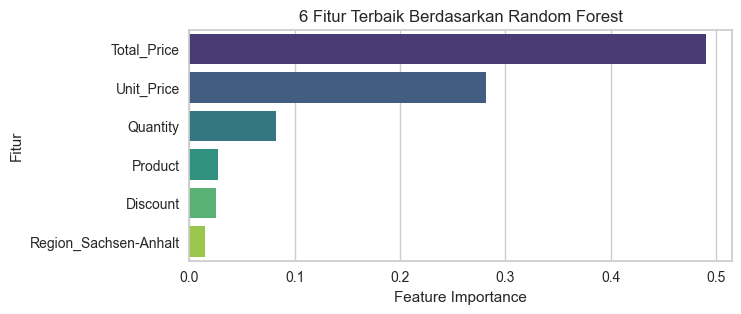


📊 5 Fitur Terbaik berdasarkan Random Forest:
                    Fitur  Importance
4             Total_Price    0.490435
1              Unit_Price    0.281382
2                Quantity    0.082339
0                 Product    0.027417
3                Discount    0.025168
24  Region_Sachsen-Anhalt    0.015088


In [180]:
df_final_agglo = df4.copy()
df_final_agglo['cluster'] = AgglomerativeClustering(n_clusters=5, linkage="single", metric="euclidean").fit_predict(df4)

# 🔹 Pisahkan fitur (X) dan cluster (y) - pastikan cluster ada di dataset
X = df_final_agglo.drop(columns=["cluster"])  # Ganti 'cluster' dengan nama kolom yang benar
y = df_final_agglo["cluster"]  # Ganti 'cluster' dengan nama kolom yang benar

# 🔹 Gunakan Random Forest untuk Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 🔹 Ambil Feature Importance
feature_importance = rf.feature_importances_

# 🔹 Buat DataFrame untuk menyimpan hasil
feat_imp_df = pd.DataFrame({
    "Fitur": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Ambil 6 fitur terbaik
top_6_features_agglo = feat_imp_df.head(6)

# Visualisasi hasil
plt.figure(figsize=(7, 3))
sns.barplot(x=top_6_features_agglo["Importance"], y=top_6_features_agglo["Fitur"], palette="viridis", hue=top_6_features_agglo["Fitur"])
plt.xlabel("Feature Importance")
plt.ylabel("Fitur")
plt.title("6 Fitur Terbaik Berdasarkan Random Forest")
plt.show()

# Menampilkan hasil fitur terbaik
print("\n📊 5 Fitur Terbaik berdasarkan Random Forest:")
print(top_6_features_agglo)

In [181]:
# Pilih label yang sediki dari Category atau Region
print("Kolom yang berawalan dengan 'Category':", [col for col in df4.columns if col.startswith("Category_")]) # ✅ Pilih label yang sediki ['Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']
print("Kolom yang berawalan dengan 'Region':", [col for col in df4.columns if col.startswith("Region_")])

Kolom yang berawalan dengan 'Category': ['Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']
Kolom yang berawalan dengan 'Region': ['Region_Baden-Württemberg', 'Region_Bayern', 'Region_Berlin', 'Region_Brandenburg', 'Region_Bremen', 'Region_Hamburg', 'Region_Hessen', 'Region_Mecklenburg-Vorpommern', 'Region_Niedersachsen', 'Region_Nordrhein-Westfalen', 'Region_Rheinland-Pfalz', 'Region_Saarland', 'Region_Sachsen', 'Region_Sachsen-Anhalt', 'Region_Schleswig-Holstein', 'Region_Thüringen']


### 3rd Model Cluster (HyperTune + Feature Select)

In [182]:
df_final_kmean2 = df_final_kmean[list(top_6_features_kmean['Fitur']) + ['Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']].copy()
df_final_kmean3 = df_final_kmean2.copy() # agar test silhoute menguji df yang tanpa cluster (df_final_kmean2)
df_final_kmean3['Cluster'] = KMeans( n_clusters=5, init="k-means++", n_init=10, algorithm="lloyd", max_iter=300, tol=0.0001, random_state=42).fit_predict(df_final_kmean2)

df_final_agglo2 = df_final_agglo[list(top_6_features_agglo['Fitur']) + ['Category_Alcoholic Beverages', 'Category_Juices', 'Category_Soft Drinks', 'Category_Water']].copy()
df_final_agglo3 = df_final_agglo2.copy() # agar test silhoute menguji df yang tanpa cluster (df_final_kmean3)
df_final_agglo3['Cluster'] = AgglomerativeClustering(n_clusters=5, linkage="single", metric="euclidean").fit_predict(df_final_agglo2)

# Tampilkan Score
kmean_score = silhouette_score(df_final_kmean2, df_final_kmean3['Cluster'])
print(f"Silhouette Score untuk K=5 KMean (Hyperparameter Tuning + 6 selected features): {kmean_score:.5f}") # 0.88550
agglo_score = silhouette_score(df_final_agglo2, df_final_agglo3['Cluster'])
print(f"Silhouette Score untuk K=5 Agglomerative (Hyperparameter Tuning + 6 selected features): {agglo_score:.5f}") # 0.96392

Silhouette Score untuk K=5 KMean (Hyperparameter Tuning + 6 selected features): 0.88550
Silhouette Score untuk K=5 Agglomerative (Hyperparameter Tuning + 6 selected features): 0.96392


# **6. Visualisasi Hasil Cluster**

## 6.1. 1st Model Result

Didapati Cluster dengan Silhoutte Score tertinggi adalah **Agglomerative (Hyperparameter Tuning) & Agglomerative (Hyperparameter Tuning + 6 Features) [df_final_agglo3]**
| Model                                      | Silhouette Score | Kondisi                                   |
|--------------------------------------------|-----------------|-------------------------------------------|
| KMeans                                     | 0.88546         | K=5                                      |
| Agglomerative                              | 0.88838         | K=5                                      |
| KMeans (Hyperparameter Tuning)             | 0.88546         | K=5, Tuning                              |
| Agglomerative (Hyperparameter Tuning)      | **[0.96392]**         | K=5, Tuning                              |
| KMeans (Hyperparameter Tuning + 6 Features)| 0.88550          | K=5, Tuning, 6 Fitur Terpilih            |
| Agglomerative (Hyperparameter Tuning + 6 Features) | **[0.96392]**  | K=5, Tuning, 6 Fitur Terpilih            |

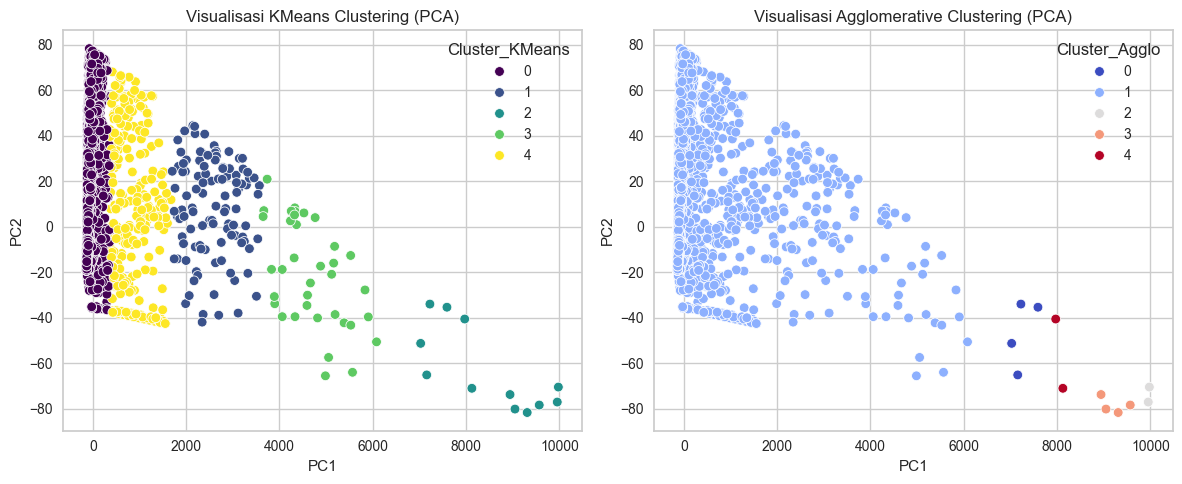

In [183]:
# 🔹 Terapkan PCA untuk reduksi dimensi ke 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df4)

# 🔹 Konversi ke DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

# 🔹 Tambahkan label cluster dari KMeans & Agglomerative
df_pca["Cluster_KMeans"] = df_final_kmean3['Cluster']  # Label dari KMeans Clustering
df_pca["Cluster_Agglo"] = df_final_agglo3['Cluster']  # Label dari Agglomerative Clustering

# 🔹 Visualisasi Hasil Clustering
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 🔹 Scatter plot untuk KMeans
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_KMeans", palette="viridis", ax=axes[0])
axes[0].set_title("Visualisasi KMeans Clustering (PCA)")

# 🔹 Scatter plot untuk Agglomerative Clustering
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_Agglo", palette="coolwarm", ax=axes[1])
axes[1].set_title("Visualisasi Agglomerative Clustering (PCA)")

plt.tight_layout()
plt.show()

🌟 Kita menggunakan 3rd Model KMeans. Karena KMeans memiliki cluster lebih terdistribusi daripada Agglomerative

In [184]:
df_final_kmean3.head() # Dataset Final Clustering

,Total_Price,Unit_Price,Quantity,Category_Alcoholic Beverages,Product,Discount,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water,Cluster
0,124.54,1.87,74,False,15,0.10,False,True,False,False,0
1,31.98,1.87,18,False,11,0.05,False,False,True,False,0
2,726.61,12.04,71,True,22,0.15,True,False,False,False,4
3,5316.13,64.91,91,True,26,0.10,True,False,False,False,3
4,6.56,1.64,4,False,13,0.00,False,True,False,False,0


## 6.2. Transformasi Ke Bentuk Original

In [185]:
### Interpretasi Target (Product & Category) ###

df_final_normal = df_final_kmean3.copy()

# menggunakan nilai original dari `df`
[col for col in df_final_kmean3.columns if col.startswith("Category")]

# Transformasi dari one-hot encoding ke satu kolom kategori
# Cari semua kolom kategori (yang diawali dengan "Category_")
category_columns = [col for col in df4.columns if col.startswith("Category_")]

# Buat kolom "Category" baru berdasarkan kolom one-hot encoding
df_final_normal["Category"] = df4[category_columns].idxmax(axis=1).str.replace("Category_", "")

# Lakukan inverse transform ke kolom "Product"
df_final_normal["Product"] = label_encoder.inverse_transform(df_final_kmean3["Product"])

# Hapus kolom one-hot jika tidak diperlukan
df_final_normal.drop(columns=[col for col in df_final_kmean3.columns if col.startswith("Category")], inplace=True)


### Inverse Data Tidak dilakukan karena data numerik sudah original ###

# Tampilkan hasil
df_final_normal.head(20)

,Total_Price,Unit_Price,Quantity,Product,Discount,Cluster,Category
0,124.54,1.87,74,Hohes C Orange,0.10,0,Juices
1,31.98,1.87,18,Fritz-Kola,0.05,0,Soft Drinks
2,726.61,12.04,71,Merlot,0.15,4,Alcoholic Beverages
3,5316.13,64.91,91,Moët & Chandon,0.10,3,Alcoholic Beverages
4,6.56,1.64,4,Granini Apple,0.00,0,Juices
5,384.88,8.62,47,Riesling,0.05,0,Alcoholic Beverages
6,8.70,1.74,5,Pepsi,0.00,0,Soft Drinks
7,27.00,1.80,15,Hohes C Orange,0.00,0,Juices
8,1550.29,30.22,57,Havana Club,0.10,4,Alcoholic Beverages
9,5.59,0.98,6,Vio Wasser,0.05,0,Water


## 6.3. 2nd Visualisasi Clustering (After Normal Transform)

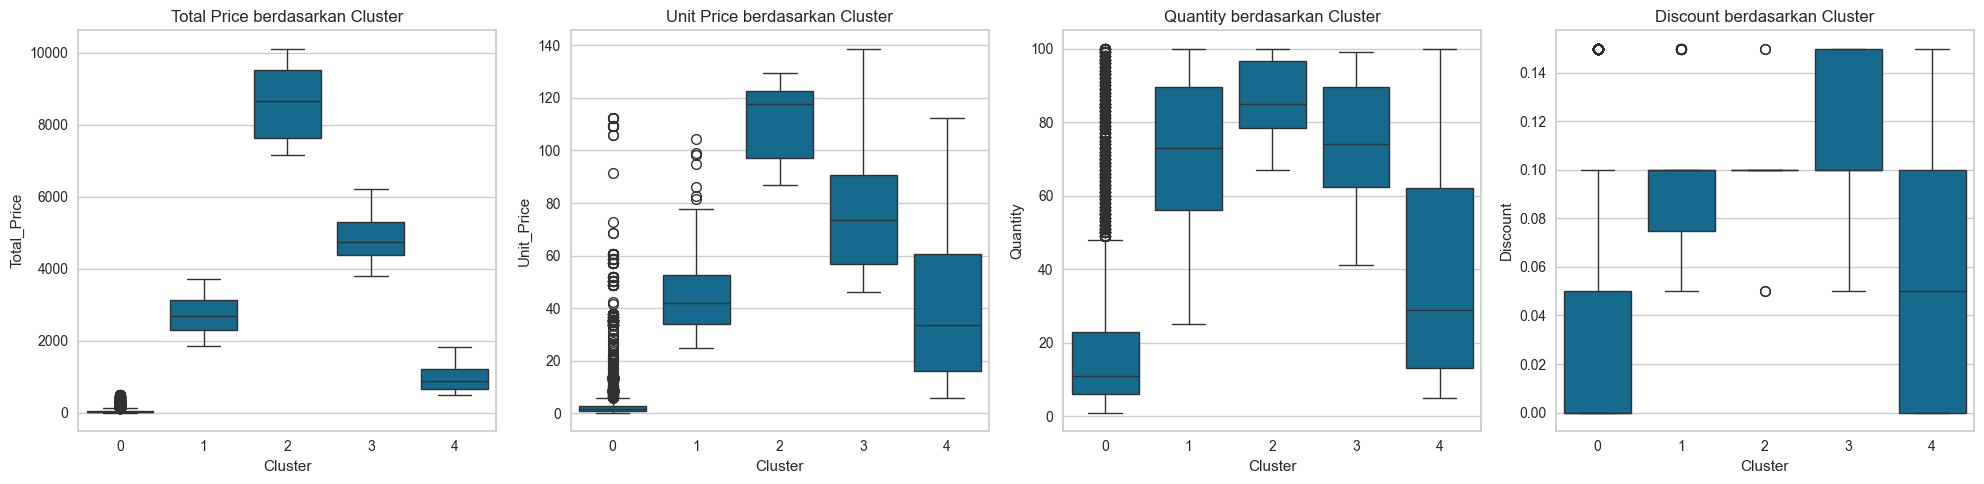

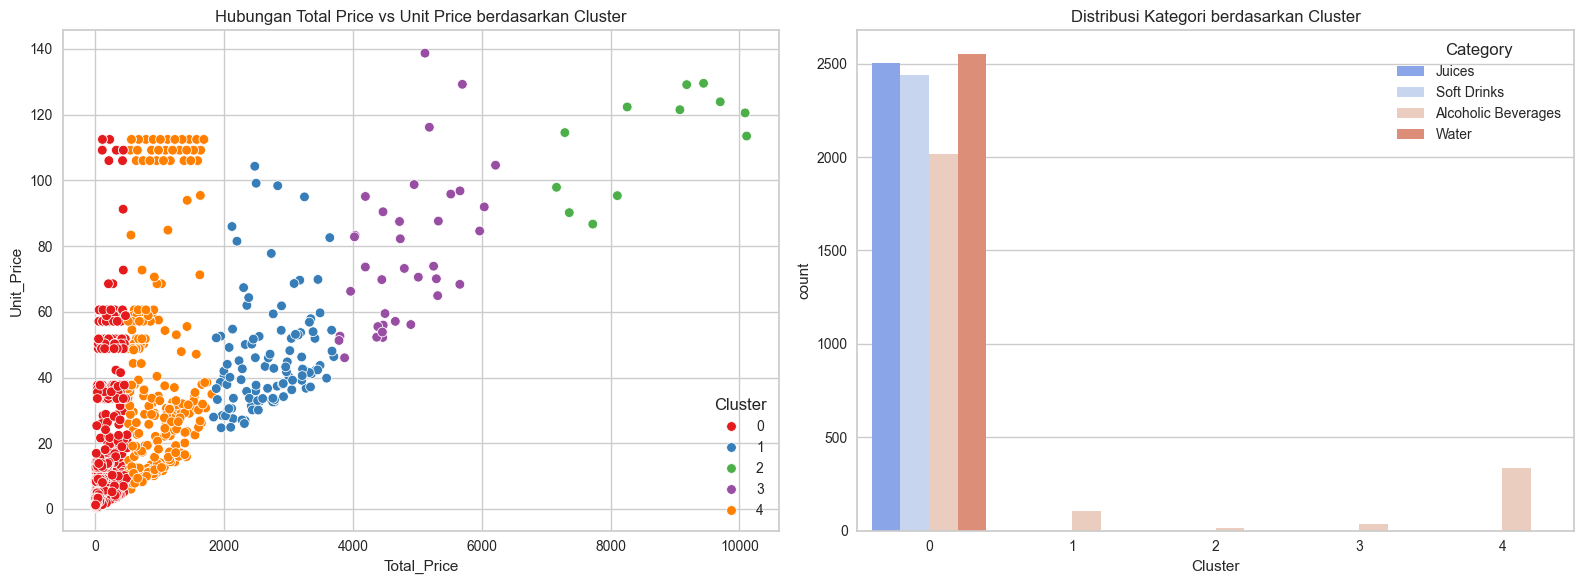

In [186]:
# Buat figure dan axis dengan 1 row & 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 baris, 4 kolom

# Boxplot Total_Price
sns.boxplot(data=df_final_normal, x="Cluster", y="Total_Price", ax=axes[0])
axes[0].set_title("Total Price berdasarkan Cluster")

# Boxplot Unit_Price
sns.boxplot(data=df_final_normal, x="Cluster", y="Unit_Price", ax=axes[1])
axes[1].set_title("Unit Price berdasarkan Cluster")

# Boxplot Quantity
sns.boxplot(data=df_final_normal, x="Cluster", y="Quantity", ax=axes[2])
axes[2].set_title("Quantity berdasarkan Cluster")

# Boxplot Discount
sns.boxplot(data=df_final_normal, x="Cluster", y="Discount", ax=axes[3])
axes[3].set_title("Discount berdasarkan Cluster")

# Atur layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

# Buat figure dengan 1 row dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot: Hubungan Total_Price vs Unit_Price berdasarkan Cluster
sns.scatterplot(data=df_final_normal, x="Total_Price", y="Unit_Price", hue="Cluster", palette="Set1", ax=axes[0])
axes[0].set_title("Hubungan Total Price vs Unit Price berdasarkan Cluster")

# Countplot: Distribusi Kategori berdasarkan Cluster
sns.countplot(data=df_final_normal, x="Cluster", hue="Category", palette="coolwarm", ax=axes[1])
axes[1].set_title("Distribusi Kategori berdasarkan Cluster")

# Tampilkan plot
plt.tight_layout()
plt.show()

# **7. Analisis Hasil Clustering**

## **7.1. Analisis Karakteristik Tiap Cluster**
Berdasarkan visualisasi yang tersedia, berikut adalah karakteristik tiap cluster:

### **Boxplot Distribusi Fitur Berdasarkan Cluster**
- **Total Price**:  
  - Cluster 2 memiliki **Total_Price** tertinggi dibandingkan cluster lainnya.
  - Cluster 3 dan 4 juga memiliki harga yang tinggi, tetapi masih di bawah Cluster 2.
  - Cluster 0 memiliki **Total_Price** terendah, menandakan transaksi dengan nilai kecil.
  
- **Unit Price**:  
  - Cluster 2 memiliki **Unit_Price** yang tinggi, menandakan bahwa produk dalam cluster ini adalah produk premium/mahal.
  - Cluster 0 memiliki **Unit_Price** yang rendah, menandakan bahwa produk dalam cluster ini cenderung lebih murah.
  
- **Quantity**:  
  - Cluster 0 memiliki distribusi **Quantity** yang lebih besar dan lebih bervariasi.
  - Cluster 3 dan 4 memiliki quantity yang tinggi, yang bisa berarti pembelian dalam jumlah besar.
  
- **Discount**:  
  - Cluster 3 memiliki discount yang lebih besar dibandingkan cluster lain.
  - Cluster 0 dan 1 mendapatkan sedikit atau bahkan hampir tidak ada discount.

### **Scatter Plot Total_Price vs Unit_Price**
- Terlihat adanya pemisahan yang jelas antara cluster berdasarkan harga produk dan jumlah pembelian.
- Cluster 2 dan 3 memiliki **Total_Price** yang tinggi, sedangkan cluster 0 mendominasi area dengan harga lebih rendah.

### **Distribusi Kategori Berdasarkan Cluster**
- Cluster 0 dan 1 lebih banyak didominasi oleh kategori **Juices** dan **Soft Drinks**.
- Cluster 3 dan 4 lebih banyak mengandung produk **Water** dan **Alcoholic Beverages**.
- Cluster 2 cenderung berisi produk dengan harga yang lebih premium.

---

## **7.2. Interpretasi & Insight Bisnis**
### **Apakah Hasil Clustering Sesuai dengan Ekspektasi?**
- Ya, hasil clustering cukup masuk akal berdasarkan pola harga dan kategori produk.
- Cluster 2 terlihat sebagai kategori high-value customers (produk premium dengan harga tinggi).
- Cluster 0 terlihat sebagai pelanggan dengan transaksi kecil, kemungkinan konsumen biasa yang membeli produk murah dalam jumlah besar.

### **Pola yang Bisa Dimanfaatkan:**
1. **Strategi Pemasaran Berdasarkan Cluster**
   - **Cluster 0 & 1** (Produk Murah – Juices & Soft Drinks): Bisa diberikan **promosi diskon volume pembelian** agar mereka membeli dalam jumlah lebih besar.
   - **Cluster 2 & 3** (Produk Premium – Alcoholic Beverages & Water): Bisa difokuskan pada strategi **loyalty program** untuk meningkatkan retensi pelanggan.

2. **Segmentasi Harga & Promosi**
   - Produk dengan **Unit_Price tinggi** bisa dijual dengan strategi **exclusive marketing** dan paket premium.
   - Produk dengan **Total_Price tinggi** bisa dipromosikan kepada pelanggan tetap untuk meningkatkan repeat order.

3. **Optimasi Stok Barang**
   - Produk dalam cluster 3 & 4 yang memiliki quantity tinggi mungkin perlu strategi supply chain yang lebih efisien untuk menghindari kehabisan stok.

---

## **7.3. Kesimpulan**
- Hasil clustering menunjukkan adanya perbedaan pola pembelian berdasarkan kategori produk dan harga.
- Bisnis dapat menggunakan insight ini untuk strategi promosi yang lebih efektif berdasarkan karakteristik masing-masing cluster.
- Perlu dilakukan validasi lebih lanjut dengan data tambahan untuk memastikan keakuratan segmentasi pelanggan.

# **8. Mengeksport Data**
10k Rows, 5 Cluster, 6 Features (4 Numeric + 2 Category)

In [ ]:
df_final_normal.to_csv('beverage_labeled.csv', index=False)